In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


In [4]:
#Import source data file

source_df = pd.read_csv('clean_houston_data.csv')
#source_df = pd.read_csv('../Downloads/Mixed_Beverage_Gross_Receipts.csv')
source_df.head(5)





,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [5]:
#Print column list

for col in source_df:
    print(col)

Location Number
Location Name
Location Address
Location City
Location State
Location Zip
Location County
Inside/Outside City Limits
Liquor Receipts
Wine Receipts
Beer Receipts
Cover Charge Receipts
Total Receipts


In [6]:
#Print source dataframe info

print(source_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374046 entries, 0 to 374045
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Location Number             374046 non-null  int64 
 1   Location Name               374046 non-null  object
 2   Location Address            374046 non-null  object
 3   Location City               374046 non-null  object
 4   Location State              374046 non-null  object
 5   Location Zip                374046 non-null  int64 
 6   Location County             374046 non-null  int64 
 7   Inside/Outside City Limits  374046 non-null  object
 8   Liquor Receipts             374046 non-null  int64 
 9   Wine Receipts               374046 non-null  int64 
 10  Beer Receipts               374046 non-null  int64 
 11  Cover Charge Receipts       374046 non-null  int64 
 12  Total Receipts              374046 non-null  int64 
dtypes: int64(8), object(5)
memory

In [7]:
#Descripte source dataframe

source_df.describe()

,Location Number,Location Zip,Location County,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
count,374046.000000,374046.000000,374046.000000,3.740460e+05,374046.000000,3.740460e+05,374046.000000,3.740460e+05
mean,8.537741,77123.053277,97.699548,1.983814e+04,7899.800904,1.158535e+04,161.790341,3.957130e+04
std,28.949778,174.967497,13.177358,3.591963e+04,23732.518201,2.868701e+04,2519.284396,6.947373e+04
min,1.000000,77002.000000,20.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,77019.000000,101.000000,1.930000e+03,35.000000,1.083000e+03,0.000000,5.100000e+03
50%,1.000000,77057.000000,101.000000,9.048000e+03,716.000000,4.555000e+03,0.000000,1.980700e+04
75%,2.000000,77090.000000,101.000000,2.351200e+04,4543.000000,1.251100e+04,0.000000,4.802300e+04
max,367.000000,77598.000000,237.000000,2.319653e+06,935543.000000,4.890745e+06,328969.000000,5.316691e+06


In [8]:
#Parse data to specfic data columns

parse1_df = source_df[["Location Number","Location Name","Location Address","Location City","Location State","Location Zip","Location County","Inside/Outside City Limits","Liquor Receipts","Wine Receipts","Beer Receipts","Cover Charge Receipts","Total Receipts"]]
parse1_df.head(5)

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [9]:
#Confirm parse

#print(parse1_df.info())

In [10]:
#Parse Data to specific citites

cities = ['HOUSTON','SOUTH HOUSTON', 'KATY', 'LEAGUE CITY', 'PASADENA','PEARLAND','SUGAR LAND', 'CYPRESS']
parse1_df.loc[parse1_df['Location City'].isin(cities)]

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374041,1,THE AGENDA,11020 SOUTHWEST FWY,HOUSTON,TX,77074,101,Y,0,0,0,0,0
374042,1,1751 SEA AND BAR,191 HEIGHTS BLVD,HOUSTON,TX,77007,101,Y,5708,7534,278,0,13520
374043,1,RAMEN BAR ICHI,1801 S DAIRY ASHFORD RD STE 108,HOUSTON,TX,77077,101,Y,1233,60,2208,0,3501
374044,2,ZANZIBAR HOUSTON,9003 WESTHEIMER STREET,HOUSTON,TX,77063,101,Y,5862,0,3444,0,9306


In [11]:
houston_df = parse1_df.loc[parse1_df['Location City'].isin(cities)]

In [12]:
parse1_df['Location City'].value_counts()

HOUSTON          310252
KATY              18123
SUGAR LAND        12885
PEARLAND           9065
PASADENA           8574
CYPRESS            8420
LEAGUE CITY        5213
SOUTH HOUSTON      1514
Name: Location City, dtype: int64

In [136]:
# Breakdown by city

#katy_df = parse1_df.loc[parse1_df['Location City'] == 'KATY']
#katy_df.head(5)

In [14]:
#EXPORT PARSED DATAFRAME TO CSV
#parse1_df.to_csv('houston_data.csv',index=False)

In [15]:
#What is the percentage breakdown of beverage types with the highest total receipts by Houston Area?(DeAndrea)

#parse1_df.groupby (['Location City']).sum ()

Total_Wine=parse1_df['Wine Receipts'].sum ()
parse1_df['%Wine Receipts']=parse1_df['Wine Receipts']/Total_Wine


Total_Beer=parse1_df['Beer Receipts'].sum ()
parse1_df['%Beer Receipts']=parse1_df['Beer Receipts']/Total_Beer

Total_Liquor=parse1_df['Liquor Receipts'].sum ()
parse1_df['%Liquor Receipts']=parse1_df['Liquor Receipts']/Total_Liquor

df3=parse1_df.groupby (['Location City'])['%Wine Receipts','%Beer Receipts','%Liquor Receipts'].agg('sum')
df3

<ipython-input-15-2b25c1393d31>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=parse1_df.groupby (['Location City'])['%Wine Receipts','%Beer Receipts','%Liquor Receipts'].agg('sum')


,%Wine Receipts,%Beer Receipts,%Liquor Receipts
Location City,,,
CYPRESS,0.008497,0.020221,0.016840
HOUSTON,0.926002,0.848839,0.868609
KATY,0.023303,0.046101,0.039432
LEAGUE CITY,0.003466,0.011467,0.010913
PASADENA,0.002141,0.021486,0.014349
PEARLAND,0.008407,0.015987,0.017183
SOUTH HOUSTON,0.000038,0.003473,0.001116
SUGAR LAND,0.028147,0.032427,0.031557


In [137]:
# Show top %receipts in each city -- Wine, Beer , Liquor

df3.sort_values('%Wine Receipts',ascending=False).head(8)



,%Wine Receipts,%Beer Receipts,%Liquor Receipts
Location City,,,
HOUSTON,92.600204,84.883890,86.860923
SUGAR LAND,2.814683,3.242651,3.155663
KATY,2.330261,4.610109,3.943195
CYPRESS,0.849669,2.022111,1.684010
PEARLAND,0.840701,1.598707,1.718334
LEAGUE CITY,0.346573,1.146671,1.091332
PASADENA,0.214104,2.148571,1.434938
SOUTH HOUSTON,0.003805,0.347290,0.111604


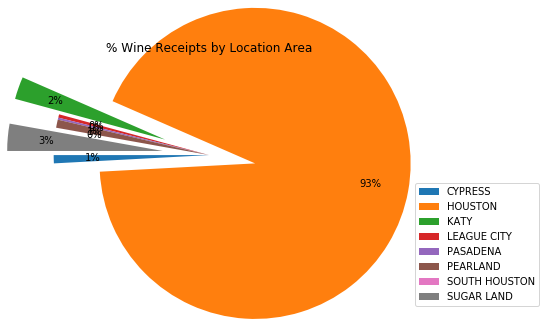

In [171]:
#dvalue1=df3[df3['%Wine Receipts']!= 92.600204]
dvalue1=(df3['%Wine Receipts'])


title = plt.title('% Wine Receipts by Location Area')

plt.pie(dvalue1, radius=2,autopct="%0.0f%%",pctdistance=0.75,explode=[0.0,0.6,0.6,0.0,0.0,0.0,0.0,0.6],startangle=180)
plt.legend(list(dvalue1.index),loc='lower right',bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure)

plt.subplots_adjust(left=0.0, bottom=0.2, right=0.45)

plt.show ()


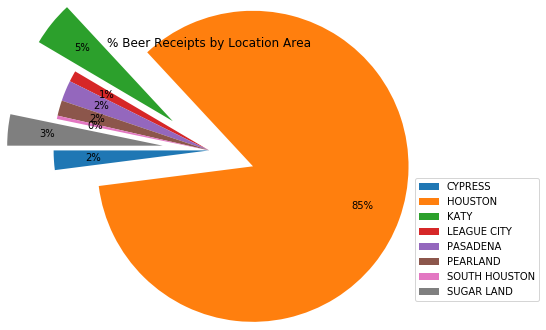

In [180]:
dvalue1=list (df3['%Beer Receipts'])
#dvalue1
title = plt.title('% Beer Receipts by Location Area')


plt.pie(dvalue1, radius=2,autopct="%0.0f%%",pctdistance=0.75,explode=[0.0,0.6,0.6,0.0,0.0,0.0,0.0,0.6],startangle=180)
plt.legend(list(df3.index),loc='lower right',bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.2, right=0.45)
#plt.savefig("output.png", bbox_inches="tight")
#plt.legend(list(df3.index))
plt.show ()

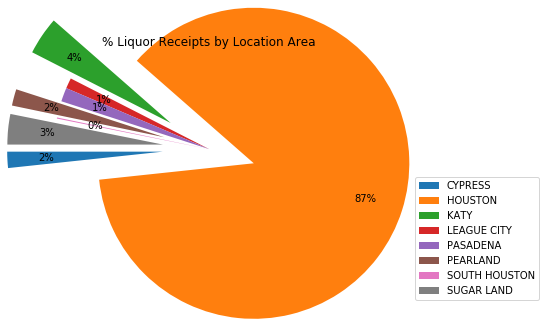

In [174]:
dvalue1=list (df3['%Liquor Receipts'])
#dvalue1
title = plt.title('% Liquor Receipts by Location Area')

plt.pie(dvalue1, radius=2,autopct="%0.0f%%",pctdistance=0.75,explode=[0.6,0.6,0.6,0.0,0.0,0.6,0.0,0.6],startangle=180)
plt.legend(list(df3.index),loc='lower right',bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.2, right=0.45)

plt.show ()

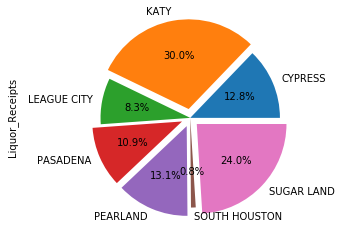

In [197]:
# Liquor - Excluded Houston
df4 = pd.DataFrame({'Location_Area': ['CYPRESS','KATY','LEAGUE CITY', 'PASADENA', 'PEARLAND', 'SOUTH HOUSTON', 'SUGAR LAND'], 'Liquor_Receipts': [1.684010,3.943195,1.091332,1.434938,1.718334,0.111604,3.155663]})

df4.Liquor_Receipts.groupby(df4.Location_Area).sum().plot(kind='pie',radius=3,autopct='%1.1f%%',explode=[0.0,0.3,0.0,0.3,0.3,0.0,0.3])
plt.axis('equal')
plt.show()

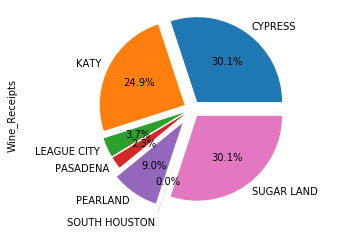

In [199]:
# Wine - Excluded Houston
df4 = pd.DataFrame({'Location_Area': ['CYPRESS','KATY','LEAGUE CITY', 'PASADENA', 'PEARLAND', 'SOUTH HOUSTON', 'SUGAR LAND'], 'Wine_Receipts': [2.814683,2.330261,0.346573,0.214104,0.840701,0.003805,2.814683]})

df4.Wine_Receipts.groupby(df4.Location_Area).sum().plot(kind='pie',autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.2,0.3,0.1])
plt.axis('equal')
plt.show()

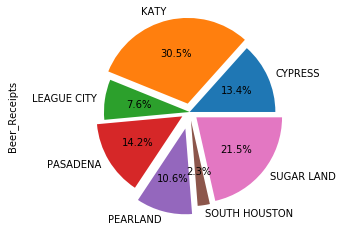

In [205]:
# Beer - Excluded Houston
df4 = pd.DataFrame({'Location_Area': ['CYPRESS','KATY','LEAGUE CITY', 'PASADENA', 'PEARLAND', 'SOUTH HOUSTON', 'SUGAR LAND'], 'Beer_Receipts': [2.022111,4.610109,1.146671,2.148571,1.598707,0.347290,3.242651]})

df4.Beer_Receipts.groupby(df4.Location_Area).sum().plot(kind='pie',autopct='%1.1f%%',explode=[0.0,0.1,0.0,0.1,0.2,0.1,0.1])
plt.axis('equal')
plt.show()